<a href="https://colab.research.google.com/github/Kunalwankhed/Hotel-booking-analysis-project-1/blob/main/colab_Kunal_Wankhede_individual_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## <b> Project Title: Hotel Booking Analysis 

# 🔰 Data Reading

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dfhotelbook = pd.read_csv('/content/drive/MyDrive/Kunal Wankhede -  Almabetter Project- Hotel Booking Analysis/Hotel Bookings.csv')

In [4]:
dfhotelbook

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
# check datatype
dfhotelbook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#look at the statistical
dfhotelbook.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
dfhotelbook.shape

(119390, 32)

# ♻ Data Preparation, Cleaning And Adding

In [8]:
#  Checking for missing values in a column
dfhotelbook.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#Drop columns with high missing values
dfhotelbook.isnull().sum()/len(dfhotelbook.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [10]:
# Drop columns with high missing values
dfhotelbook=dfhotelbook.drop(['agent','company'],axis=1)

In [11]:
# delete rows with empty cells
dfhotelbook = dfhotelbook.dropna(axis = 0)

In [12]:
#Now I will drop the days_in_waiting_list column because we won't use it for this analysis
dfhotelbook = dfhotelbook.drop(labels='days_in_waiting_list', axis=1)

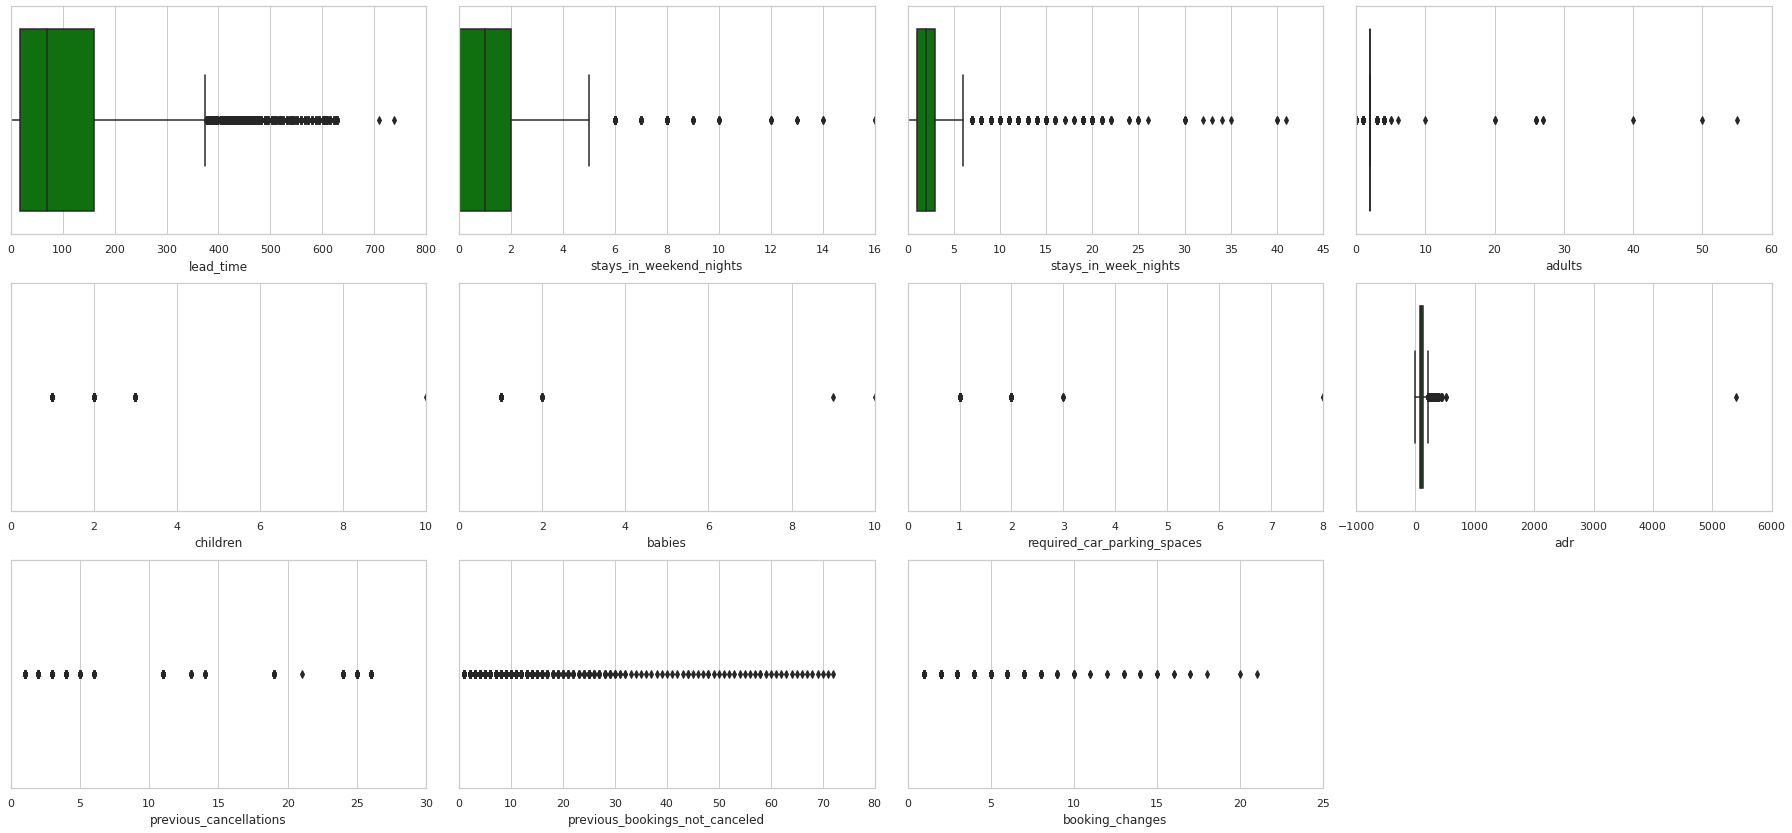

In [13]:
# build boxplots to see it better
hotelfeature = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.rcParams['figure.figsize'] = 25,15
for column in hotelfeature:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(dfhotelbook[column],color=('green'))
  plt.tight_layout()

In [14]:
# Remove the outliers by using conditionals to get and update these values
dfhotelbook.loc[dfhotelbook.lead_time > 500, 'lead_time'] = 500
dfhotelbook.loc[dfhotelbook.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
dfhotelbook.loc[dfhotelbook.adults > 4, 'adults'] = 4
dfhotelbook.loc[dfhotelbook.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
dfhotelbook.loc[dfhotelbook.previous_cancellations > 0, 'previous_cancellations'] = 1
dfhotelbook.loc[dfhotelbook.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
dfhotelbook.loc[dfhotelbook.booking_changes > 5, 'booking_changes'] = 5
dfhotelbook.loc[dfhotelbook.babies > 8, 'babies'] = 0
dfhotelbook.loc[dfhotelbook.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
dfhotelbook.loc[dfhotelbook.children > 8, 'children'] = 0
dfhotelbook.loc[dfhotelbook.adr > 1000, 'adr'] = 1000

In this section, we will explore the data to get insights about it.

Lets merge 'children' and 'babies' columns into 'kids' column.

Then, we set the string type to the corresponding columns.

In [15]:
dfhotelbook['kids'] = dfhotelbook.children + dfhotelbook.babies

# Marge total mumbers by adding kids and adults
dfhotelbook['total_members'] = dfhotelbook.kids + dfhotelbook.adults

# Convert the datatypes to string
dfhotelbook['arrival_date_year'] = dfhotelbook['arrival_date_year'].astype('str')
dfhotelbook['arrival_date_month'] = dfhotelbook['arrival_date_month'].astype('str')
dfhotelbook['arrival_date_day_of_month'] = dfhotelbook['arrival_date_day_of_month'].astype('str')
dfhotelbook['is_canceled'] = dfhotelbook['is_canceled'].astype('str')
dfhotelbook['is_repeated_guest'] = dfhotelbook['is_repeated_guest'].astype('str')

# 🏩 **" Hotels "** 

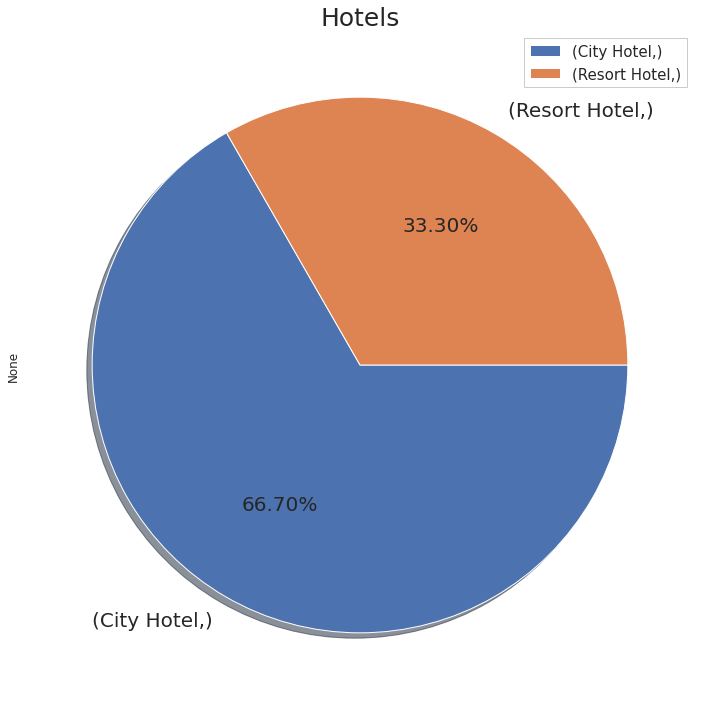

In [16]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook[['hotel']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20} ,shadow=True, counterclock=False)
plt.title('Hotels',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

* City hotels are more available as compared to resort hotels
* City hotel are available 66.70%
* Resort hotel are available 33.30%



---


 # ✅ Total Canceled booking and Confirmed booking 

---
* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 

In [17]:
pd.DataFrame(dfhotelbook[['is_canceled']].value_counts().sort_values(),
             columns=['Total Numbers of Bookings (Canceled = 1) and (Confirmed = 0) '])

,Total Numbers of Bookings (Canceled = 1) and (Confirmed = 0)
is_canceled,
1,44153
0,74745


In [18]:
pd.DataFrame((dfhotelbook[['is_canceled']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Total Numbers of Bookings % (Canceled = 1) and (Confirmed = 0) '])

,Total Numbers of Bookings % (Canceled = 1) and (Confirmed = 0)
is_canceled,
1,37.135192
0,62.864808


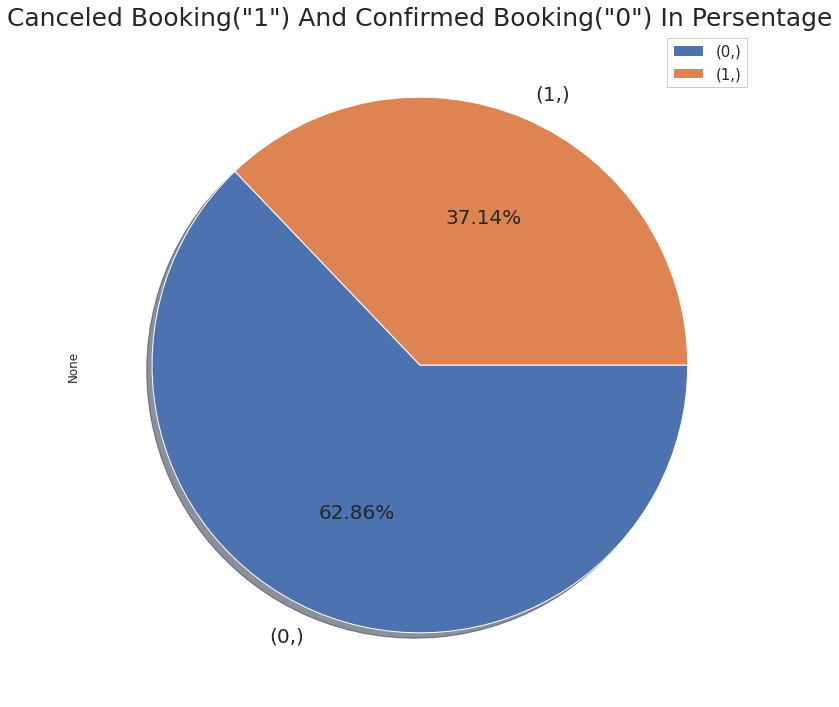

In [19]:
plt.figure(figsize=(12,12))
# Ues a pie chart
(dfhotelbook[['is_canceled']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20},shadow=True, counterclock=False)
plt.title('Canceled Booking("1") And Confirmed Booking("0") In Persentage',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()



*   74745 bookings were canceled which is  62.86%
*   44153 bookings were canceled which is  37.14%






---


# ✅ Canceled Booking and Confirmed Booking In ***'  The Hotels '***

---


* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 






In [20]:
pd.DataFrame(dfhotelbook[['hotel','is_canceled']].value_counts().sort_values(),
             columns=['Hotel wise Canceled Booking("1") And Confirmed Booking("0")'])

Hotel wise Canceled Booking("1") And Confirmed Booking("0")
hotel        is_canceled                                                             
Resort Hotel 1                                                        11077          
             0                                                        28519          
City Hotel   1                                                        33076          
             0                                                        46226

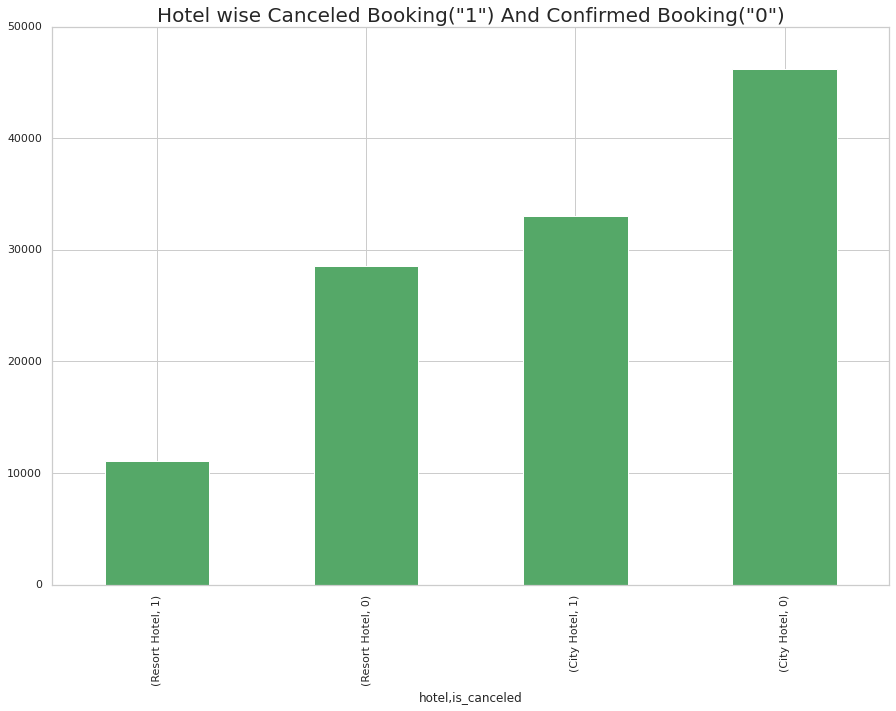

In [21]:
plt.figure(figsize=(15,10))
# bar plot
dfhotelbook[['hotel','is_canceled']].value_counts().sort_values().plot(kind='bar',color='g')
plt.title('Hotel wise Canceled Booking("1") And Confirmed Booking("0")',
          fontsize = 20)
# Show the bar plot
plt.show()


city hotels had the most bookings as compared to resort hotels

In [22]:
pd.DataFrame((dfhotelbook[['hotel','is_canceled']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Hotel wise Canceled Booking("1") And Confirmed Booking("0") In Percentades'])

Hotel wise Canceled Booking("1") And Confirmed Booking("0") In Percentades
hotel        is_canceled                                                                            
Resort Hotel 1                                                     9.316389                         
             0                                                    23.986106                         
City Hotel   1                                                    27.818803                         
             0                                                    38.878703

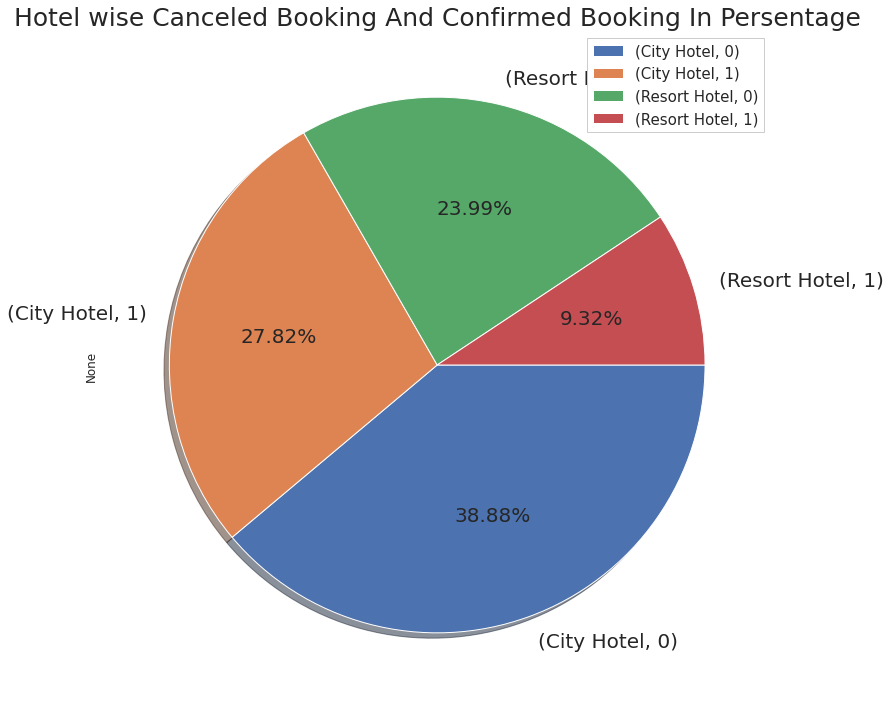

In [23]:
plt.figure(figsize=(12,12))
# pie chart
(dfhotelbook[['hotel','is_canceled']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%',textprops={'fontsize': 20},shadow=True, counterclock=False)
plt.title('Hotel wise Canceled Booking And Confirmed Booking In Persentage',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

##According dataframe, bar plot and pie chart:

 Resort Hotel

* Canceled bookinging is 11077 and 9.31%
* Confirmed booking is 33076 and 23.98%

City Hotel

* Canceled bookinging is 33076 and 27.98%
* Confirmed booking is 46226 and 38. 87%



---


# ✅  Canceled Booking and Confirmed Booking In ***' The Hotel Per Year '***

---


* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 

In [24]:
pd.DataFrame(dfhotelbook[['hotel','is_canceled','arrival_date_year',]].value_counts().sort_index(),
             columns=['Hotel wise Canceled Booking ("1") And Confirmed Booking("0") Per Year'])

Hotel wise Canceled Booking ("1") And Confirmed Booking("0") Per Year
hotel        is_canceled arrival_date_year                                                                       
City Hotel   0           2015                                                            7677                    
                         2016                                                           22732                    
                         2017                                                           15817                    
             1           2015                                                            5986                    
                         2016                                                           15403                    
                         2017                                                           11687                    
Resort Hotel 0           2015                                                            6076                    
                         2016                                                           13390                    
                         2017                                                            9053                    
             1           2015                                                            2120                    
                         2016                                                            4910                    
                         2017                                                            4047

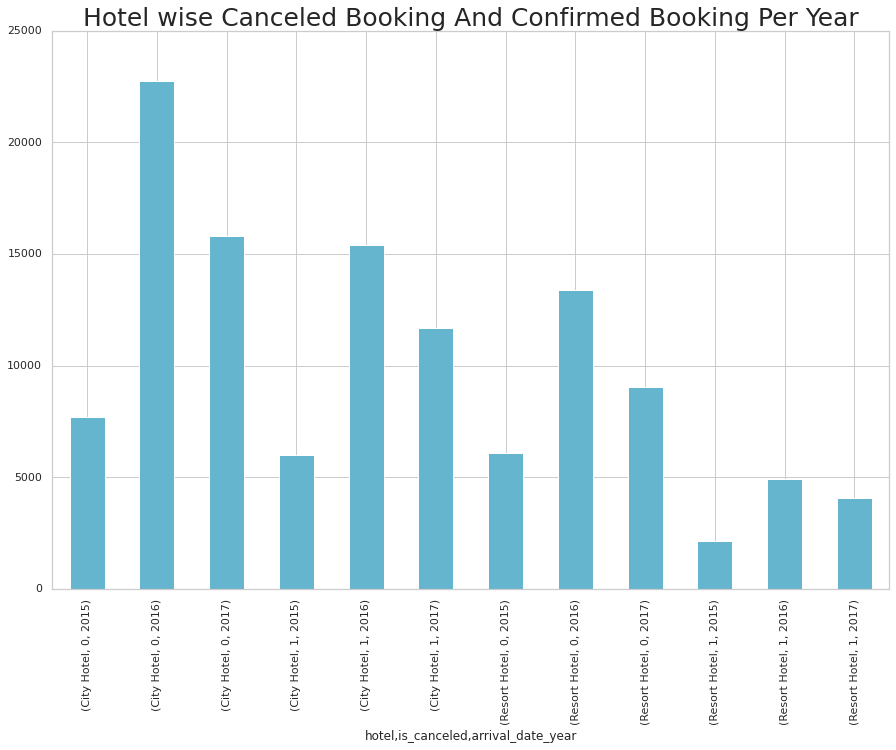

In [25]:
plt.figure(figsize=(15,10))

dfhotelbook[['hotel','is_canceled','arrival_date_year',]].value_counts().sort_index().plot(kind='bar',color='c')
plt.title('Hotel wise Canceled Booking And Confirmed Booking Per Year',
          fontsize = 25)
# Show the bar plot
plt.show()

According dataframe and bar plot:
* In 2016, city hotels and resort hotels had the highest number of confirmed bookings as compare to 2015, 2017 
* In 2015, city hotels and resort hotels had the lowest number of confirmed bookings as compare to 2016, 2017 
* In 2016, city hotels and resort hotels had the highest number of canceled bookings as compare to 2015, 2017 
* In 2015, city hotels and resort hotels had the lowest number of canceled bookings as compare to 2016, 2017 

In [26]:
pd.DataFrame((dfhotelbook[['hotel','is_canceled','arrival_date_year']].value_counts(normalize=True)*[100]).sort_values(),
             columns=[' Hotel wise Canceled Booking ("1") And Confirmed Booking ("0")  Per Year In Percentage'])

Hotel wise Canceled Booking ("1") And Confirmed Booking ("0")  Per Year In Percentage
hotel        is_canceled arrival_date_year                                                                                        
Resort Hotel 1           2015                                                        1.783041                                     
                         2017                                                        3.403758                                     
                         2016                                                        4.129590                                     
City Hotel   1           2015                                                        5.034567                                     
Resort Hotel 0           2015                                                        5.110263                                     
City Hotel   0           2015                                                        6.456795                                     
Resort Hotel 0           2017                                                        7.614089                                     
City Hotel   1           2017                                                        9.829434                                     
Resort Hotel 0           2016                                                       11.261754                                     
City Hotel   1           2016                                                       12.954802                                     
             0           2017                                                       13.302999                                     
                         2016                                                       19.118909

# which month had most booking?

In [27]:
pd.DataFrame(dfhotelbook['arrival_date_month'].value_counts().sort_values())

,arrival_date_month
January,5874
December,6728
November,6752
February,8012
March,9739
September,10467
June,10927
April,11045
October,11095
May,11779


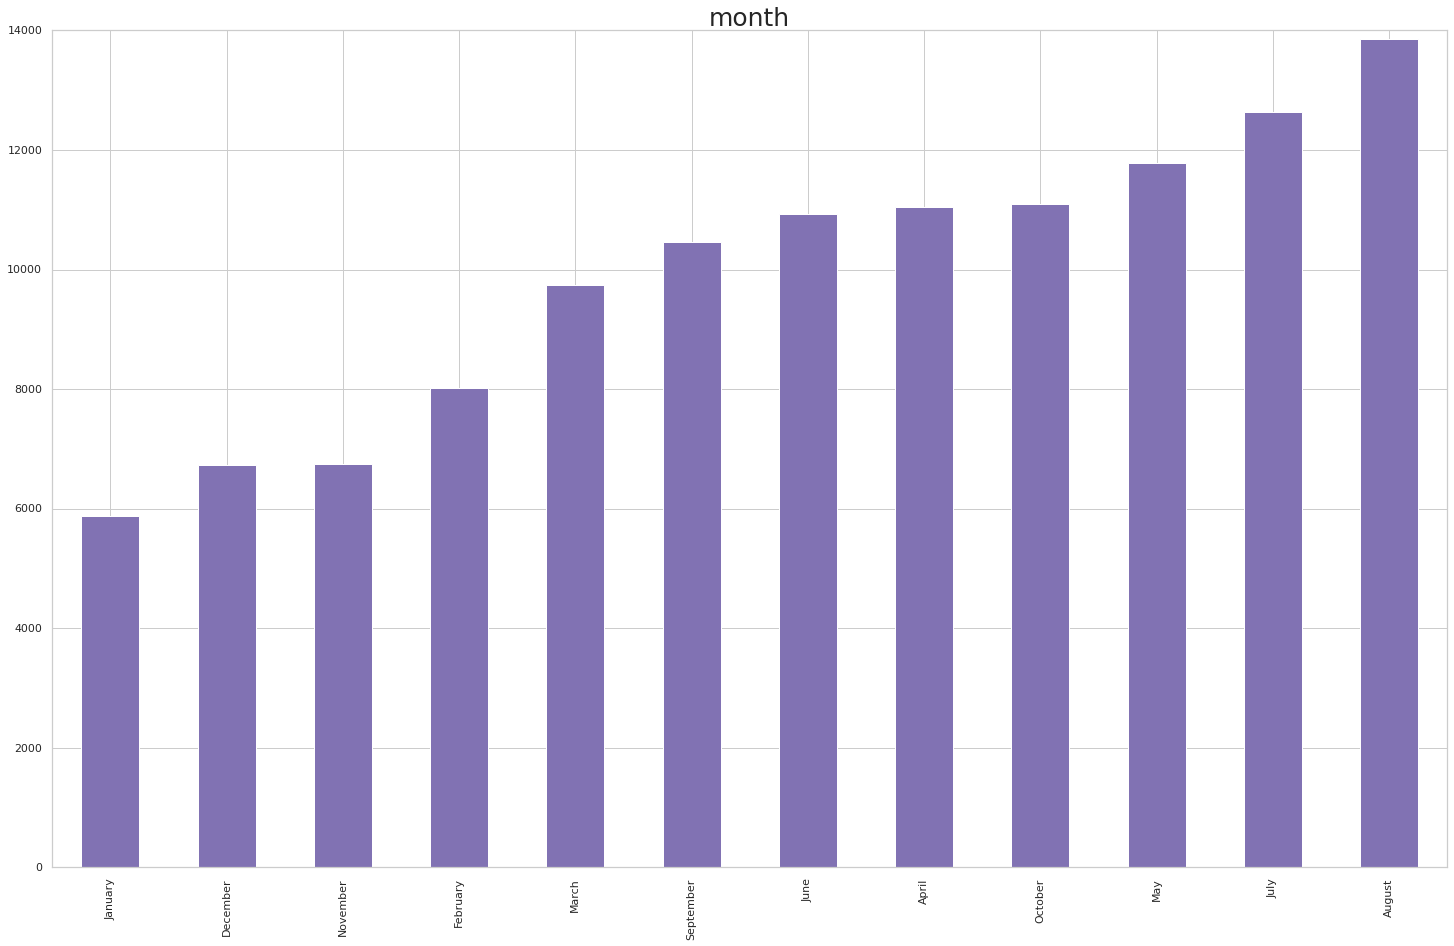

<Figure size 864x864 with 0 Axes>

In [28]:

# Bar plot
(dfhotelbook['arrival_date_month'].value_counts().sort_values()).plot(kind='bar',color='m')

plt.title('month',
          fontsize = 25)
plt.figure(figsize=(12,12))
# Show the bar plot
plt.show()

In [29]:
pd.DataFrame(dfhotelbook.arrival_date_month.value_counts(normalize=True).sort_values())

,arrival_date_month
January,0.049404
December,0.056586
November,0.056788
February,0.067385
March,0.081911
September,0.088033
June,0.091902
April,0.092895
October,0.093315
May,0.099068


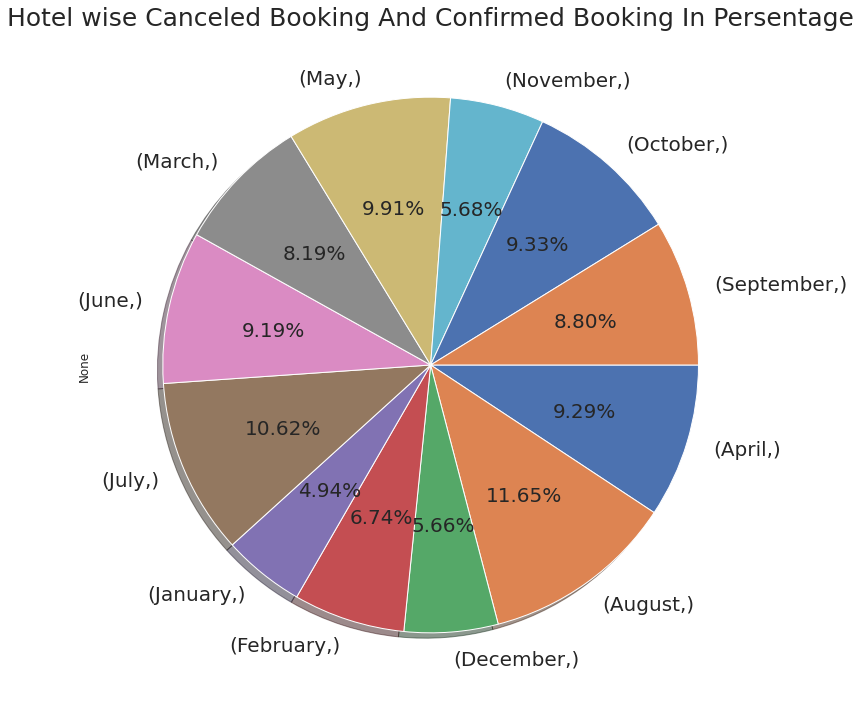

In [30]:
plt.figure(figsize=(12,12))
# use a Pie chart
(dfhotelbook[['arrival_date_month']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%',textprops={'fontsize': 20},shadow=True, counterclock=False)
plt.title('Hotel wise Canceled Booking And Confirmed Booking In Persentage',
          fontsize = 25)
# Show the pie chart
plt.show()



---


# ✅  Canceled Booking and Confirmed Booking In ***' Hotel Per Month '***


---

* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 



In [31]:
Hotel_booking_pm = pd.DataFrame(dfhotelbook[['hotel','is_canceled','arrival_date_year','arrival_date_month']].value_counts().sort_values(),
             columns=['Hotel Wise Canceled Booking ("1") And Confirmed Booking ("0") Per Month'])
Hotel_booking_pm

Hotel Wise Canceled Booking ("1") And Confirmed Booking ("0") Per Month
hotel        is_canceled arrival_date_year arrival_date_month                                                                         
Resort Hotel 1           2016              January                                                           119                      
                         2015              November                                                          185                      
                         2017              January                                                           205                      
                         2016              November                                                          275                      
City Hotel   1           2015              November                                                          301                      
...                                                                                                          ...                      
             0           2017              July                                                             2235                      
                         2016              May                                                              2240                      
                                           October                                                          2272                      
                                           September                                                        2304                      
                         2017              May                                                              2339                      

[104 rows x 1 columns]

In [32]:

pd.DataFrame((dfhotelbook[['hotel','is_canceled','arrival_date_year','arrival_date_month']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Hotel wise Canceled Booking ("1") And Confirmed Booking ("0")  Per Month In Percentages'])

Hotel wise Canceled Booking ("1") And Confirmed Booking ("0")  Per Month In Percentages
hotel        is_canceled arrival_date_year arrival_date_month                                                                                         
Resort Hotel 1           2016              January                                                      0.100086                                      
                         2015              November                                                     0.155596                                      
                         2017              January                                                      0.172417                                      
                         2016              November                                                     0.231291                                      
City Hotel   1           2015              November                                                     0.253158                                      
...                                                                                                          ...                                      
             0           2017              July                                                         1.879762                                      
                         2016              May                                                          1.883968                                      
                                           October                                                      1.910882                                      
                                           September                                                    1.937795                                      
                         2017              May                                                          1.967232                                      

[104 rows x 1 columns]

According dataframe:
* In May 2017, city hotels had the highest confirmed bookings is 2339 and 1.96%
* In July 2015, city hotels had the lowest confirmed bookings is 459 and 0.38%
* In May 2017, city hotels had the highest canceled booking is 2217 and 1.83%
* In 	November 2015, city hotels had the lowest canceled bookings is 301 and 0.25%
* In October 2016, resort hotels had the highest confirmed bookings is 1392 and 1.17%
* In January 2016, resort hotels had the lowest confirmed bookings is 732 and 0.61%
* In August 2017, resort hotels had the highest of canceled bookings is 693 and 0.58%
* In January 2016, resort hotels had the lowest of canceled bookings is 119 and 0.10%




---


# ✅ Canceled Booking and Booking Confirmed In ***' The Hotel Per Days '***

---

* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 

In [33]:

pd.DataFrame(dfhotelbook[['is_canceled','hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']].value_counts().sort_values(),
             columns=['Hotel wise Canceled Booking ("1") And Confirmed Booking ("0")  Per Days'])

Hotel wise Canceled Booking ("1") And Confirmed Booking ("0")  Per Days
is_canceled hotel        arrival_date_year arrival_date_month arrival_date_day_of_month                                                                         
1           Resort Hotel 2016              January            19                                                                         1                      
                                           December           14                                                                         1                      
                         2015              December           18                                                                         1                      
                                                              2                                                                          1                      
                                           October            15                                                                         1                      
...                                                                                                                                    ...                      
0           City Hotel   2016              June               24                                                                       204                      
1           City Hotel   2016              February           17                                                                       209                      
                         2017              May                19                                                                       214                      
                         2015              October            16                                                                       221                      
                         2016              November           7                                                                        227                      

[3146 rows x 1 columns]

In [34]:
pd.DataFrame((dfhotelbook[['is_canceled','hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Bookings Percentage (cancelled = 1) and (Confirmed = 0) in the Hotel per days'])

Bookings Percentage (cancelled = 1) and (Confirmed = 0) in the Hotel per days
is_canceled hotel        arrival_date_year arrival_date_month arrival_date_day_of_month                                                                               
1           Resort Hotel 2016              January            19                                                                  0.000841                            
                                           December           14                                                                  0.000841                            
                         2015              December           18                                                                  0.000841                            
                                                              2                                                                   0.000841                            
                                           October            15                                                                  0.000841                            
...                                                                                                                                    ...                            
0           City Hotel   2016              June               24                                                                  0.171576                            
1           City Hotel   2016              February           17                                                                  0.175781                            
                         2017              May                19                                                                  0.179986                            
                         2015              October            16                                                                  0.185874                            
                         2016              November           7                                                                   0.190920                            

[3146 rows x 1 columns]

According dataframe:
* In 24 June 2016, city hotels had the highest confirmed bookings is 204 and 0.17%
* In 2,6,9,13,16 July 2015, city hotels had the lowest confirmed bookings is 1 
* In 7 November 2016, city hotels had the highest canceled booking is 227 and 0.19%
* In 19 August 2015, 1,15,16,21 November 2015, 20,21 December 2015	,11 January 2016, city hotels had the lowest canceled bookings is 1
* In 5 December 2015, resort hotels had the highest confirmed bookings is 116 and 0.10%
* In 29 November 2015, resort hotels had the lowest confirmed bookings is 4
* In 5 December 2015, resort hotels had the highest of canceled bookings is 106 and 0.09%



 

---


# ✅Total Booking Of the ***' Country '***

---



In [35]:

pd.DataFrame(dfhotelbook[['country']].value_counts().sort_values(),
             columns=['Total Booking In the Country ']) 

,Total Booking In the Country
country,
PYF,1
SLE,1
DMA,1
AIA,1
ASM,1
...,...
DEU,7287
ESP,8568
FRA,10415


In [36]:
pd.DataFrame((dfhotelbook[['country']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Total Booking In The Country In Percentages ']) 

,Total Booking In The Country In Percentages
country,
PYF,0.000841
SLE,0.000841
DMA,0.000841
AIA,0.000841
ASM,0.000841
...,...
DEU,6.128783
ESP,7.206177
FRA,8.759609


According dataframe:
* Top 5 Country highest Had bookings
1. PTR had bookings is 48576 and 40.86%
2. GBR had bookings is 12219 and 10.20%
3. FRA had bookings is 10415 and 8.76%
4. ESP has bookings is 8568 and 7.21%
5. DEU had bookings is 7287 and 7.13%

* Country loweest Had bookings

PYF	,SLE, DMA, AIA, ASM, NPL, VGB,ATF, BDI, BFA, BHS, UMI, BWA, NIC, CYM, SMR, FJI, DJI, MRT, MMR, MDG, LCA, NAM, MLI, KIR, PLW, HND, GUY, NCL









---


#✅ Total Booking Of the ***' Meal '***


---

* Undefined/SC **:** ▶ no meal package
* BB **:** ▶ Bed & Breakfast
* HB **:** ▶ Half board 
* FB **:** ▶ Full board 

In [37]:
pd.DataFrame(dfhotelbook['meal'].value_counts().sort_values())
             

,meal
FB,798
Undefined,1165
SC,10638
HB,14434
BB,91863


<Figure size 1080x720 with 0 Axes>

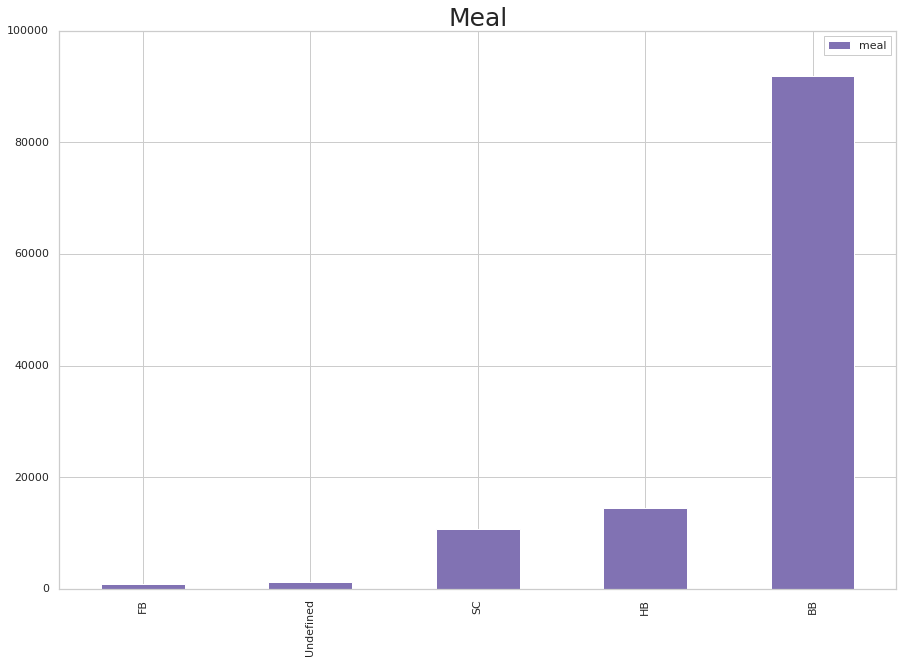

In [38]:
plt.figure(figsize=(15,10))
# ues a bar plot
pd.DataFrame(dfhotelbook['meal'].value_counts().sort_values()).plot(kind='bar',color='m',figsize=(15,10))
plt.title('Meal',
          fontsize = 25)
# Show the bar plot
plt.show()

In [39]:
pd.DataFrame(((dfhotelbook[['meal']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['meal in Percentage'])

,meal in Percentage
meal,
FB,0.671164
Undefined,0.979831
SC,8.947165
HB,12.139817
BB,77.262023


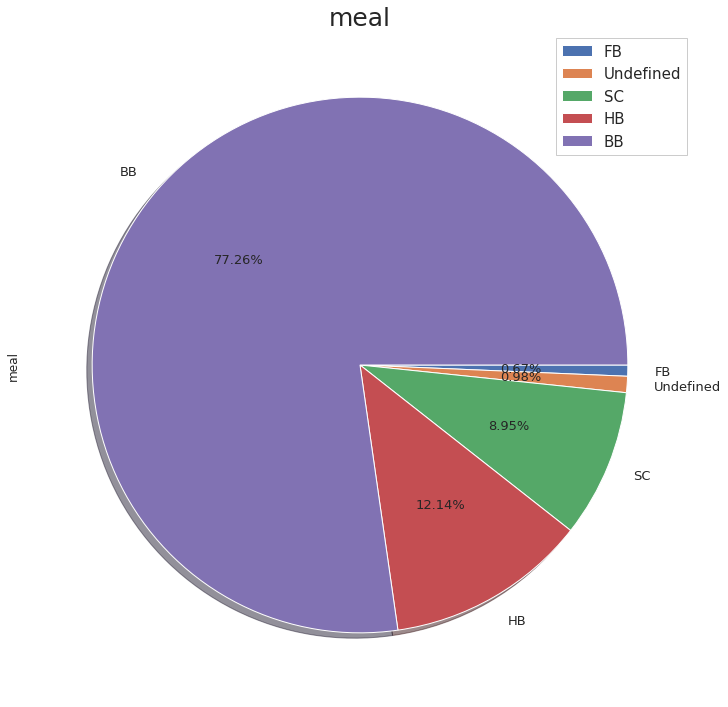

In [40]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['meal'].value_counts()*[100]).sort_values().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 13},shadow=True, counterclock=False)
plt.title('meal',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 91863 and 77.26% is the highest bookings for bed & breakfast type meals
* 798 and 0.67% is the lowest bookings for Full board type meals

 

---


# ✅ Total Bookings In the ***' Market Segment '***

---


*   TA **:** ▶ Travel Agents
*   TO **:** ▶ Tour Operators




In [41]:
pd.DataFrame(dfhotelbook['market_segment'].value_counts().sort_values())
             

,market_segment
Aviation,237
Complementary,734
Corporate,5111
Direct,12448
Groups,19806
Offline TA/TO,24160
Online TA,56402


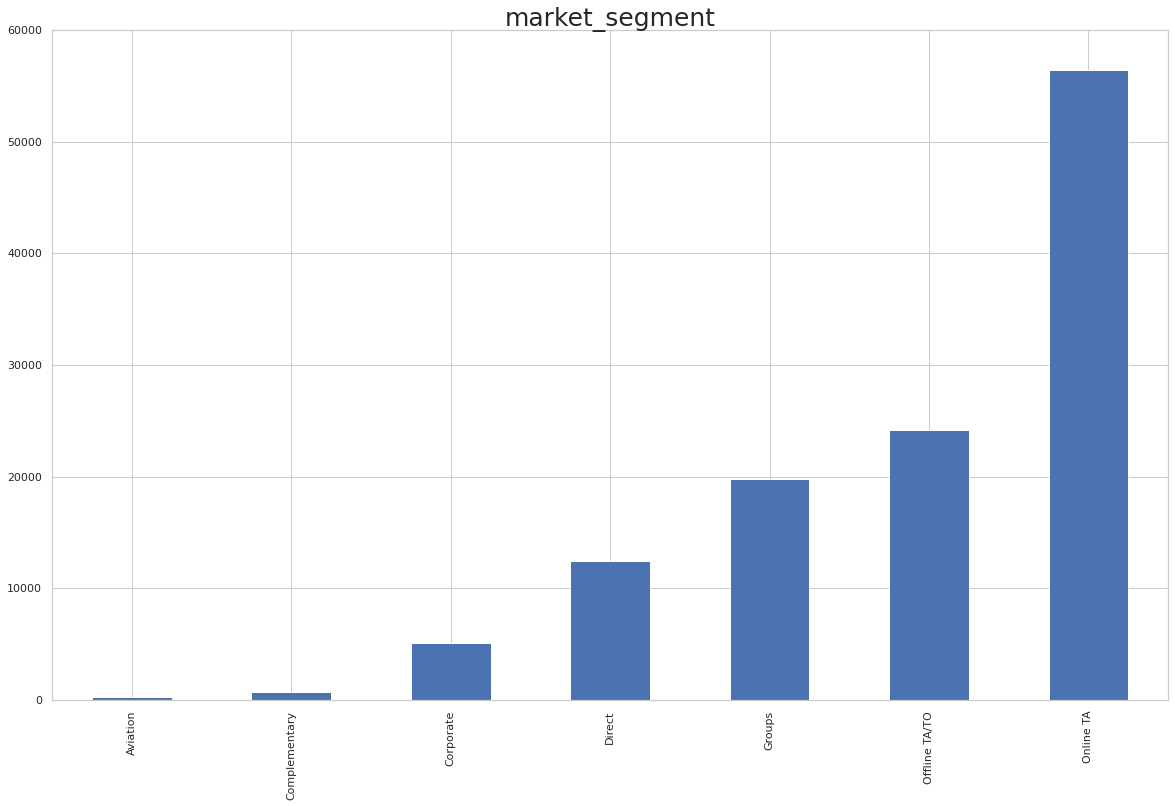

In [42]:
plt.figure(figsize=(20,12))
# ues a bar plot
dfhotelbook['market_segment'].value_counts().sort_values().plot(kind='bar')
plt.title('market_segment',
          fontsize = 25)
# Show the bar plot
plt.show()

In [43]:
pd.DataFrame(((dfhotelbook[['market_segment']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['market_segment in Percentage'])

,market_segment in Percentage
market_segment,
Aviation,0.199331
Complementary,0.617336
Corporate,4.298643
Direct,10.469478
Groups,16.657976
Offline TA/TO,20.319938
Online TA,47.437299


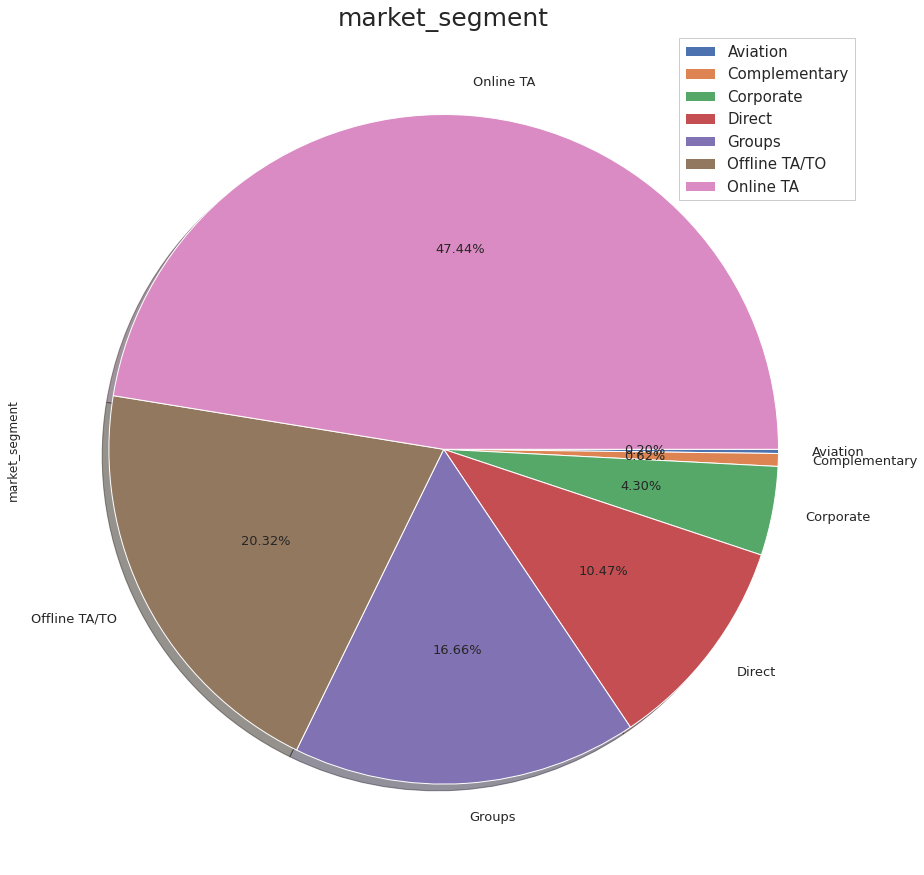

In [44]:
plt.figure(figsize=(15,15))
# use a pie chart
(dfhotelbook['market_segment'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 13},shadow=True, counterclock=False)
plt.title('market_segment',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 56402 and 47.43% is the highest bookings for Online Travel Agents type Market Segment 
* 237 and 0.20% is the lowest bookings for aviation type Market Segment 



---


#✅ Total Bookings In the ***' Customer Type '***


---

* Contract **:** ▶ when the booking has an allotment or other type of contract associated to it
* Group **:** ▶  when the booking is associated to a group
* Transient **:** ▶  when the booking is not part of a group or contract, and is not associated to other transient booking
* Transient-party **:** ▶  when the booking is transient, but is associated to at least other transient booking

In [45]:
pd.DataFrame(dfhotelbook['customer_type'].value_counts().sort_values())
             

,customer_type
Group,570
Contract,4076
Transient-Party,25078
Transient,89174


<Figure size 720x1080 with 0 Axes>

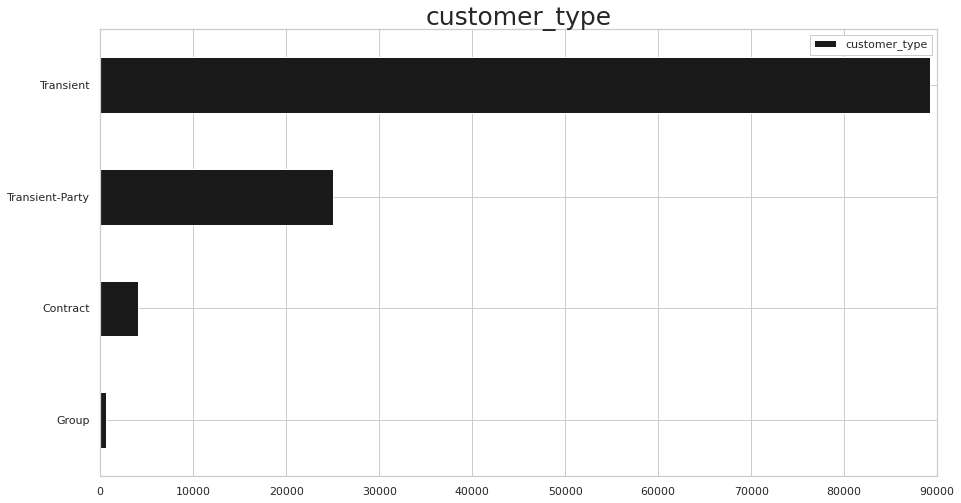

In [46]:
plt.figure(figsize=(10,15))
# ues a bar plot
pd.DataFrame(dfhotelbook['customer_type'].value_counts().sort_values()).plot(kind='barh',color='k',figsize=(15, 8))
plt.title('customer_type',
          fontsize = 25)
# Show the bar plot
plt.show()

In [47]:
pd.DataFrame(((dfhotelbook[['customer_type']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['customer_type in Percentage'])

,customer_type in Percentage
customer_type,
Group,0.479403
Contract,3.428148
Transient-Party,21.092028
Transient,75.000421


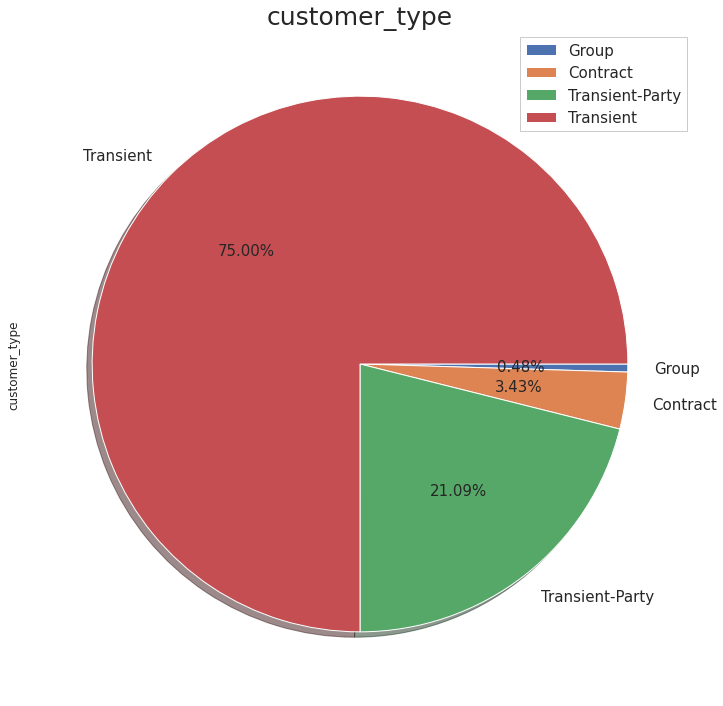

In [48]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['customer_type'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 15},shadow=True, counterclock=False)
plt.title('customer_type',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 89174 and 75.00% is the highest bookings for group type Customer 
* 570 and 0.47% is the loweest bookings for Transient type Customer

 

---


# ✅ Total Bookings In ***' Reserved Room type '***

---



In [49]:
pd.DataFrame(dfhotelbook['reserved_room_type'].value_counts().sort_values())

,reserved_room_type
P,2
L,6
H,601
C,931
B,1114
G,2083
F,2890
E,6497
D,19173
A,85601


<Figure size 720x1080 with 0 Axes>

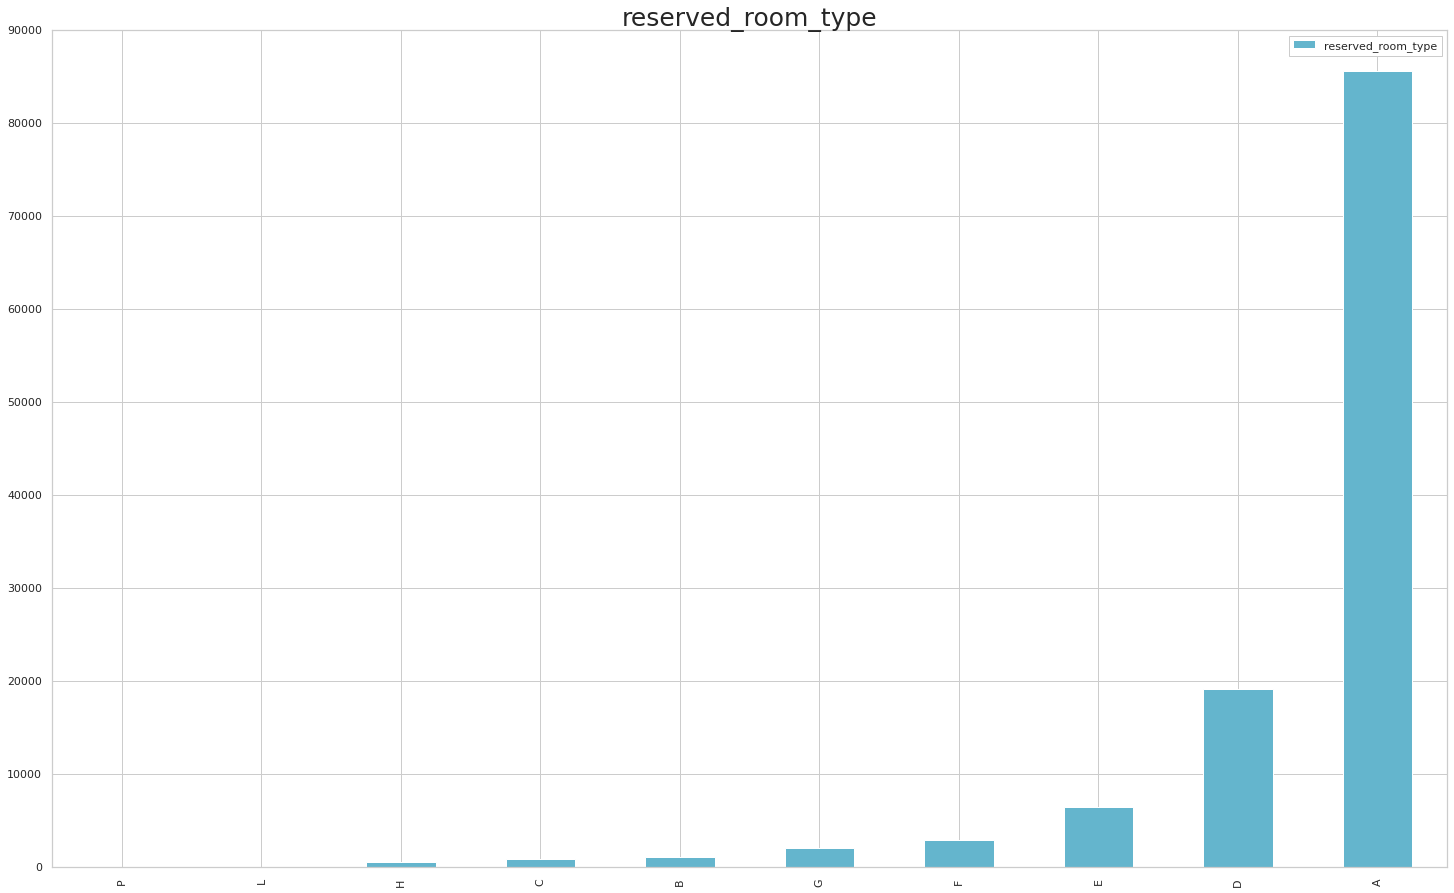

In [50]:
plt.figure(figsize=(10,15))
# ues a bar plot
pd.DataFrame(dfhotelbook['reserved_room_type'].value_counts().sort_values()).plot(kind='bar',color='c')
plt.title('reserved_room_type',
          fontsize = 25)
# Show the bar plot
plt.show()

In [51]:
pd.DataFrame(((dfhotelbook[['reserved_room_type']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['reserved_room_type In Percentage'])

,reserved_room_type In Percentage
reserved_room_type,
P,0.001682
L,0.005046
H,0.505475
C,0.783024
B,0.936938
G,1.751922
F,2.430655
E,5.464348
D,16.125587


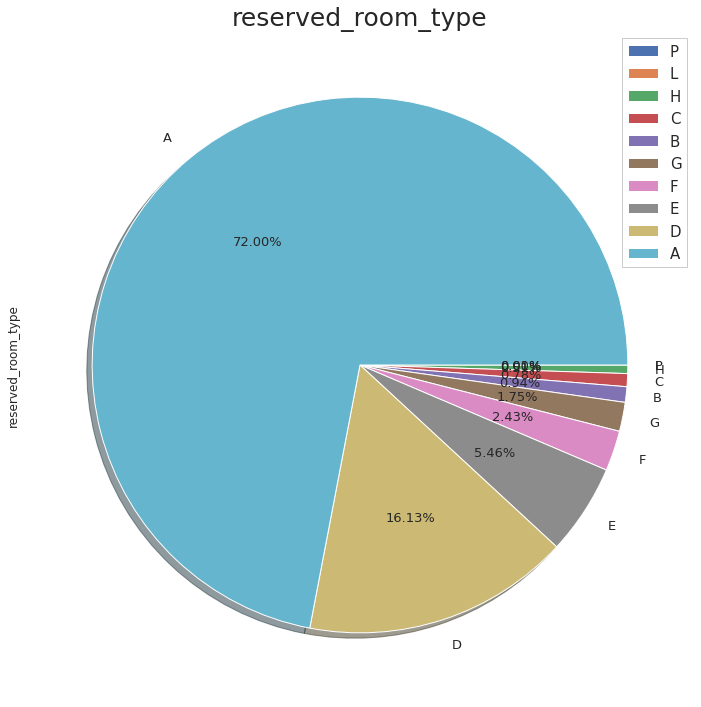

In [52]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['reserved_room_type'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 13}, radius=1 ,shadow=True, counterclock=False)
plt.title('reserved_room_type',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 85601 and 71.99% is the highest bookings for  A type Reserved Room
* 2 and 6  is the loweest bookings for P and L type Reserved Room

 

---


# ✅ Total Bookings In ***' Assigned Room type '***

---



In [53]:
pd.DataFrame(dfhotelbook['assigned_room_type'].value_counts().sort_values())

,assigned_room_type
L,1
P,2
K,279
I,357
H,708
B,2159
C,2354
G,2539
F,3732
E,7738


<Figure size 720x1080 with 0 Axes>

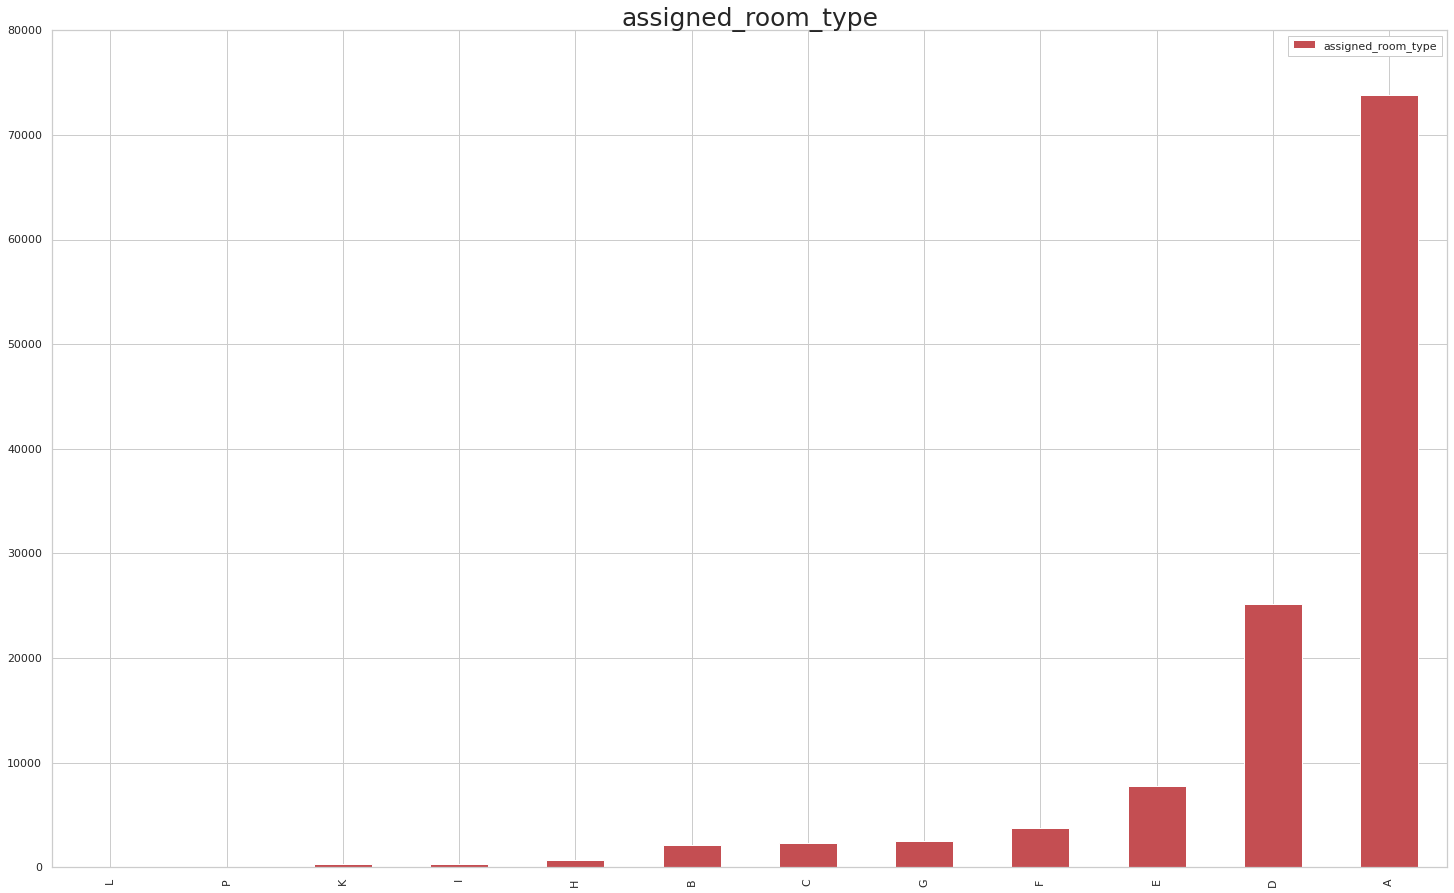

In [54]:
plt.figure(figsize=(10,15))
# ues a bar plot
pd.DataFrame(dfhotelbook['assigned_room_type'].value_counts().sort_values()).plot(kind='bar',color='r')
plt.title('assigned_room_type',
          fontsize = 25)
# Show the bar plot
plt.show()

In [55]:
pd.DataFrame(((dfhotelbook[['assigned_room_type']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['assigned_room_type In Percentage'])

,assigned_room_type In Percentage
assigned_room_type,
L,0.000841
P,0.001682
K,0.234655
I,0.300257
H,0.595468
B,1.815842
C,1.979848
G,2.135444
F,3.138825


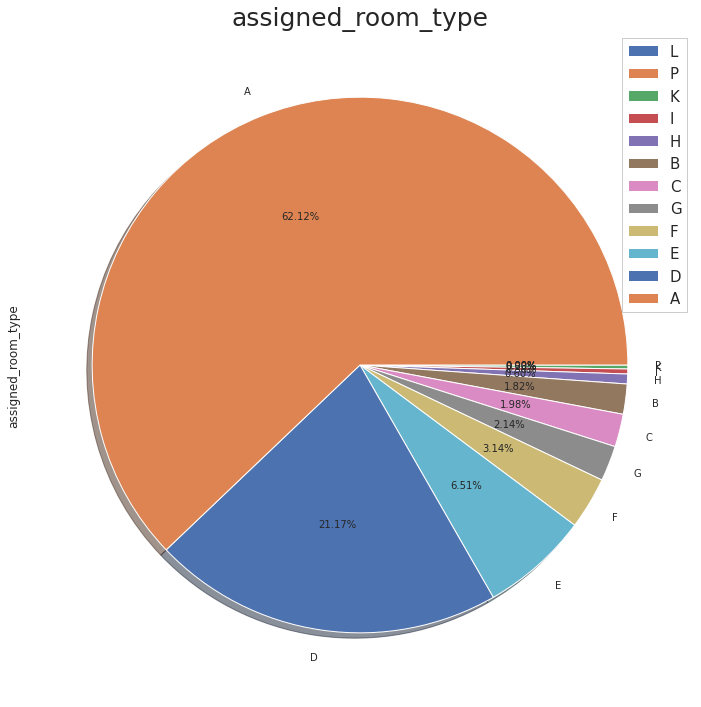

In [56]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['assigned_room_type'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 10},shadow=True, counterclock=False)
plt.title('assigned_room_type',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 73863 and 62.12% is the highest bookings for  A type Assigned Room
* 1 and 2  is the lowest bookings for P and L type Assigned Room

 

---


 # ✅ Totals Bookings In  ***' Booking Changes '***

---



In [57]:
pd.DataFrame(dfhotelbook['booking_changes'].value_counts().sort_values())
             

,booking_changes
5,267
4,375
3,925
2,3790
1,12639
0,100902


<Figure size 720x1080 with 0 Axes>

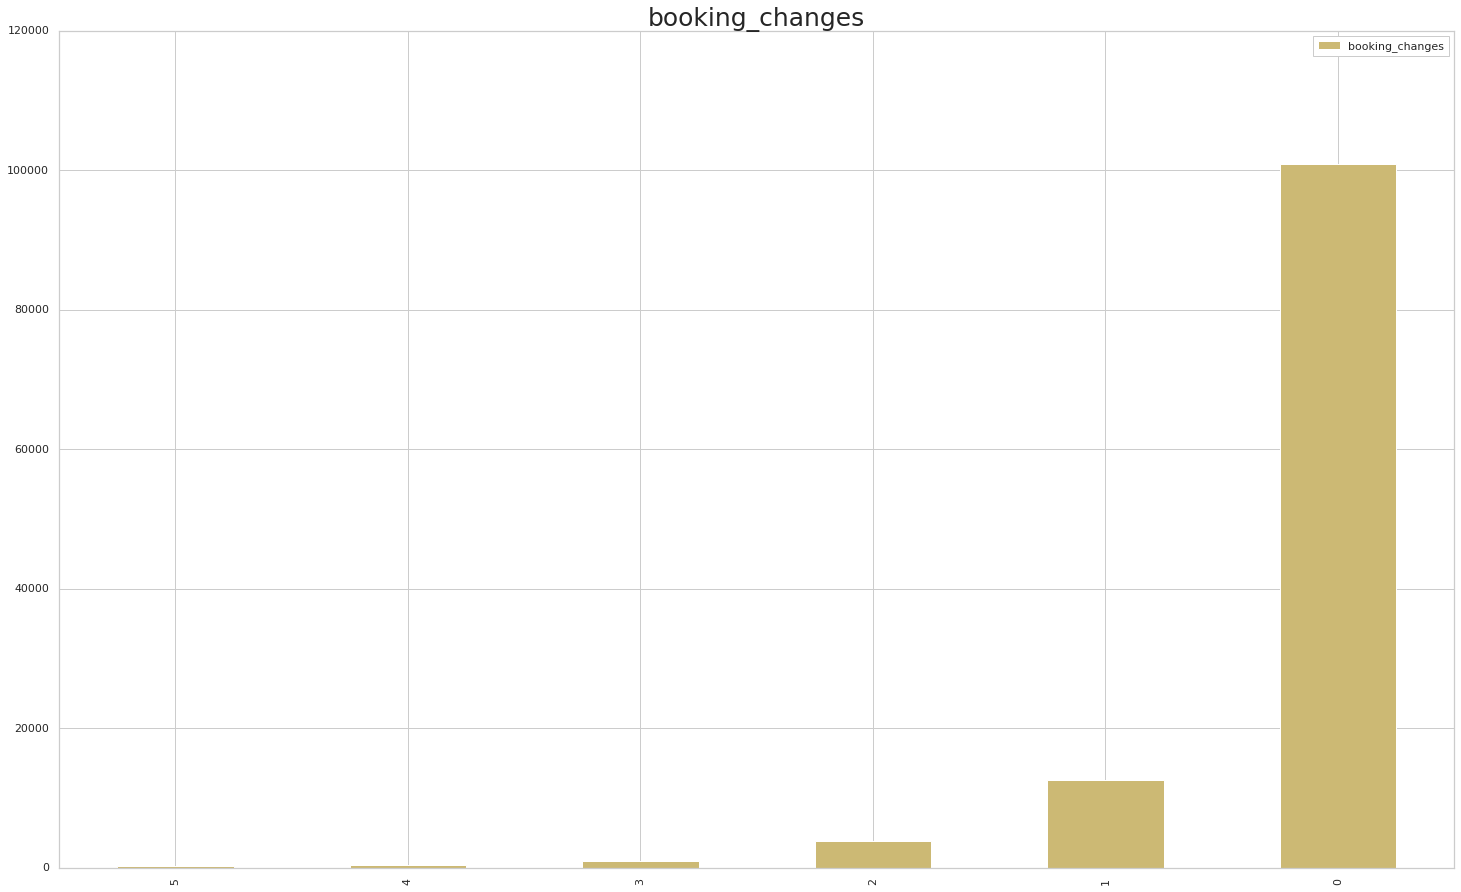

In [58]:
plt.figure(figsize=(10,15))
# ues abar plot
pd.DataFrame(dfhotelbook['booking_changes'].value_counts().sort_values()).plot(kind='bar',color='y')
plt.title('booking_changes',
          fontsize = 25)
# Show the bar plot
plt.show()

In [59]:
pd.DataFrame(((dfhotelbook[['booking_changes']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['booking_changes In Percentage'])

,booking_changes In Percentage
booking_changes,
5,0.224562
4,0.315396
3,0.777978
2,3.187606
1,10.630120
0,84.864337


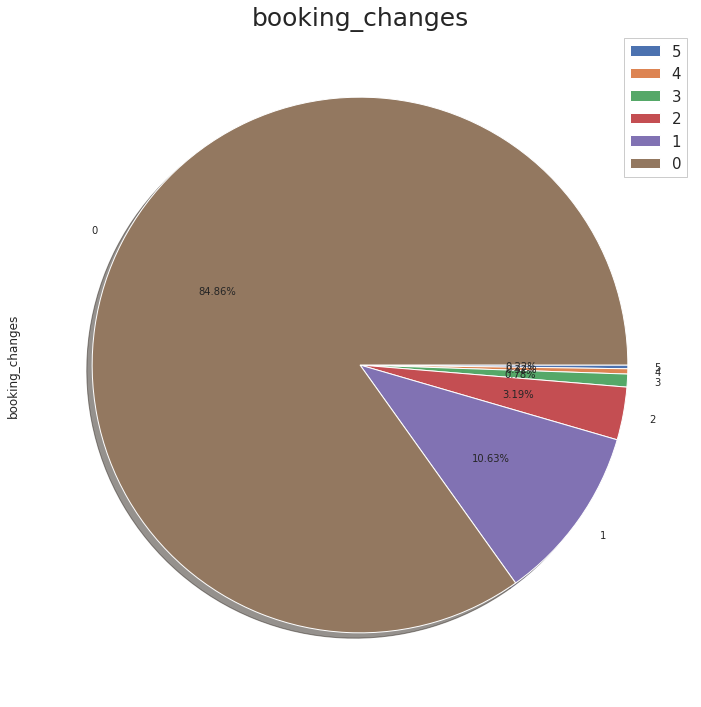

In [60]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['booking_changes'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 10},shadow=True, counterclock=False)
plt.title('booking_changes',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 100902 and 84.86% is the highest bookings for  0 type Booking Changes
* 267, 375 and 925 is the loweest bookings for 5,4 and 3 type Booking Changes



---


#✅ Total Bookings In ***' Distribution Channel '***


---

* TA **:** ▶ Travel Agents
* TO **:** ▶  Tour Operators

In [61]:
pd.DataFrame(dfhotelbook['distribution_channel'].value_counts().sort_values())
             

,distribution_channel
Undefined,1
GDS,193
Corporate,6491
Direct,14483
TA/TO,97730


<Figure size 720x1080 with 0 Axes>

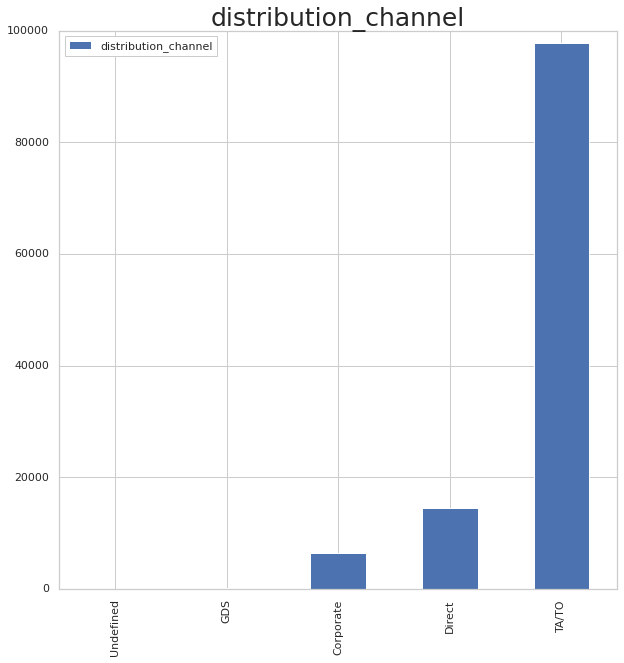

In [62]:
plt.figure(figsize=(10,15))
# use abar plot
pd.DataFrame(dfhotelbook['distribution_channel'].value_counts().sort_values()).plot(kind='bar',color='b',figsize=(10,10))
plt.title('distribution_channel',
          fontsize = 25)
# Show the bar plot
plt.show()

In [63]:
pd.DataFrame(((dfhotelbook[['distribution_channel']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['distribution_channel In Percentage'])

,distribution_channel In Percentage
distribution_channel,
Undefined,0.000841
GDS,0.162324
Corporate,5.459301
Direct,12.181029
TA/TO,82.196505


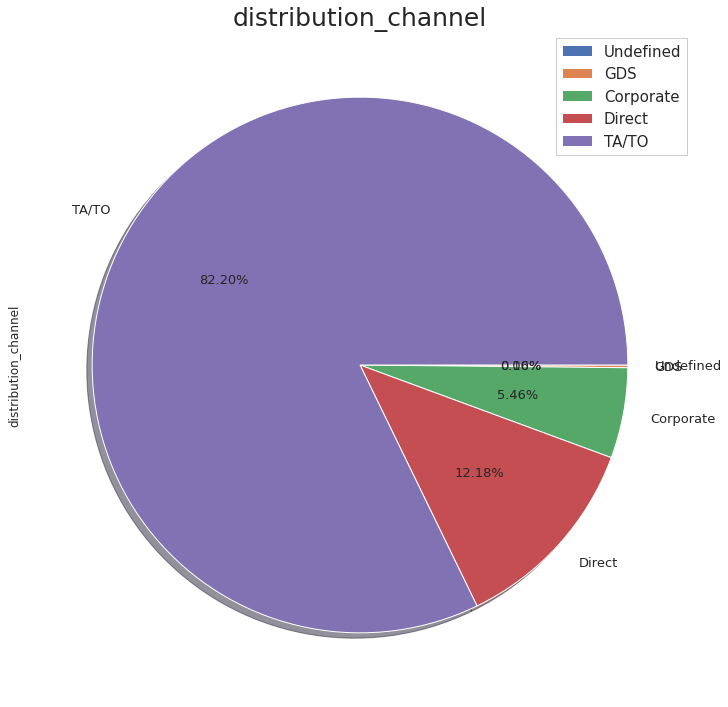

In [64]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['distribution_channel'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 13},shadow=True, counterclock=False)
plt.title('distribution_channel',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 97730 and 82.19% is the highest bookings for  TA/TO type Distribution Channel
* 1 is the lowest bookings for Undefined type Distribution Channel



---


#✅ Total Bookings Of ***' Repeated Guest '***


---

* 1 **:** ▶ repeated guest
* 0 **:** ▶  Not

In [65]:
pd.DataFrame(dfhotelbook[['is_repeated_guest']].value_counts().sort_values())

,0
is_repeated_guest,
1,3806
0,115092


<Figure size 720x1080 with 0 Axes>

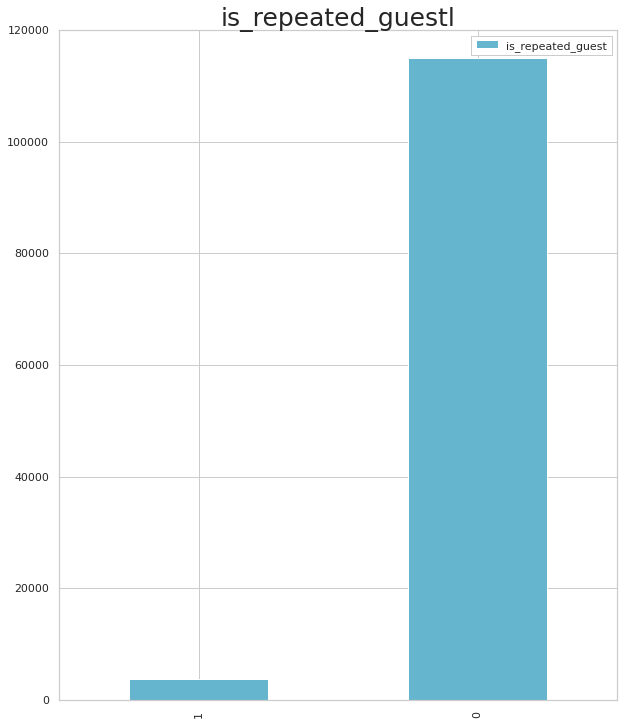

In [66]:
plt.figure(figsize=(10,15))
# use a bar plot
pd.DataFrame(dfhotelbook['is_repeated_guest'].value_counts().sort_values()).plot(kind='bar',color='c', figsize=(10,12))
plt.title('is_repeated_guestl',
          fontsize = 25)
# Show the bar plot
plt.show()

In [67]:
pd.DataFrame(((dfhotelbook[['is_repeated_guest']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['is_repeated_guest In Percentage'])

,is_repeated_guest In Percentage
is_repeated_guest,
1,3.201063
0,96.798937


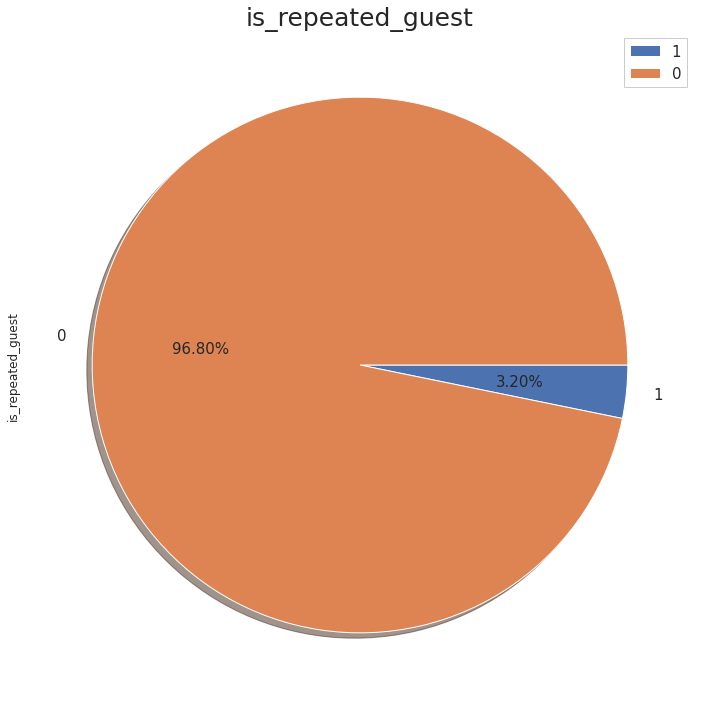

In [68]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['is_repeated_guest'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 15},shadow=True, counterclock=False)
plt.title('is_repeated_guest',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 115092 and 96.80% is the highest bookings for  not type Repeated Guest
* 3806 and 3.20% is the loweest bookings for repeated guest type Repeated Guest



---


#✅ Total Bookings Of ***'  Deposit Type '***


---

* No Deposit**:** ▶ no deposit was made
* Non Refund **:** ▶ a deposit was made in the value of the total stay cost
* Refundable**:** ▶ a deposit was made with a value under the total cost of stay.


In [69]:
pd.DataFrame(dfhotelbook['deposit_type'].value_counts().sort_values())
             

,deposit_type
Refundable,162
Non Refund,14573
No Deposit,104163


<Figure size 720x360 with 0 Axes>

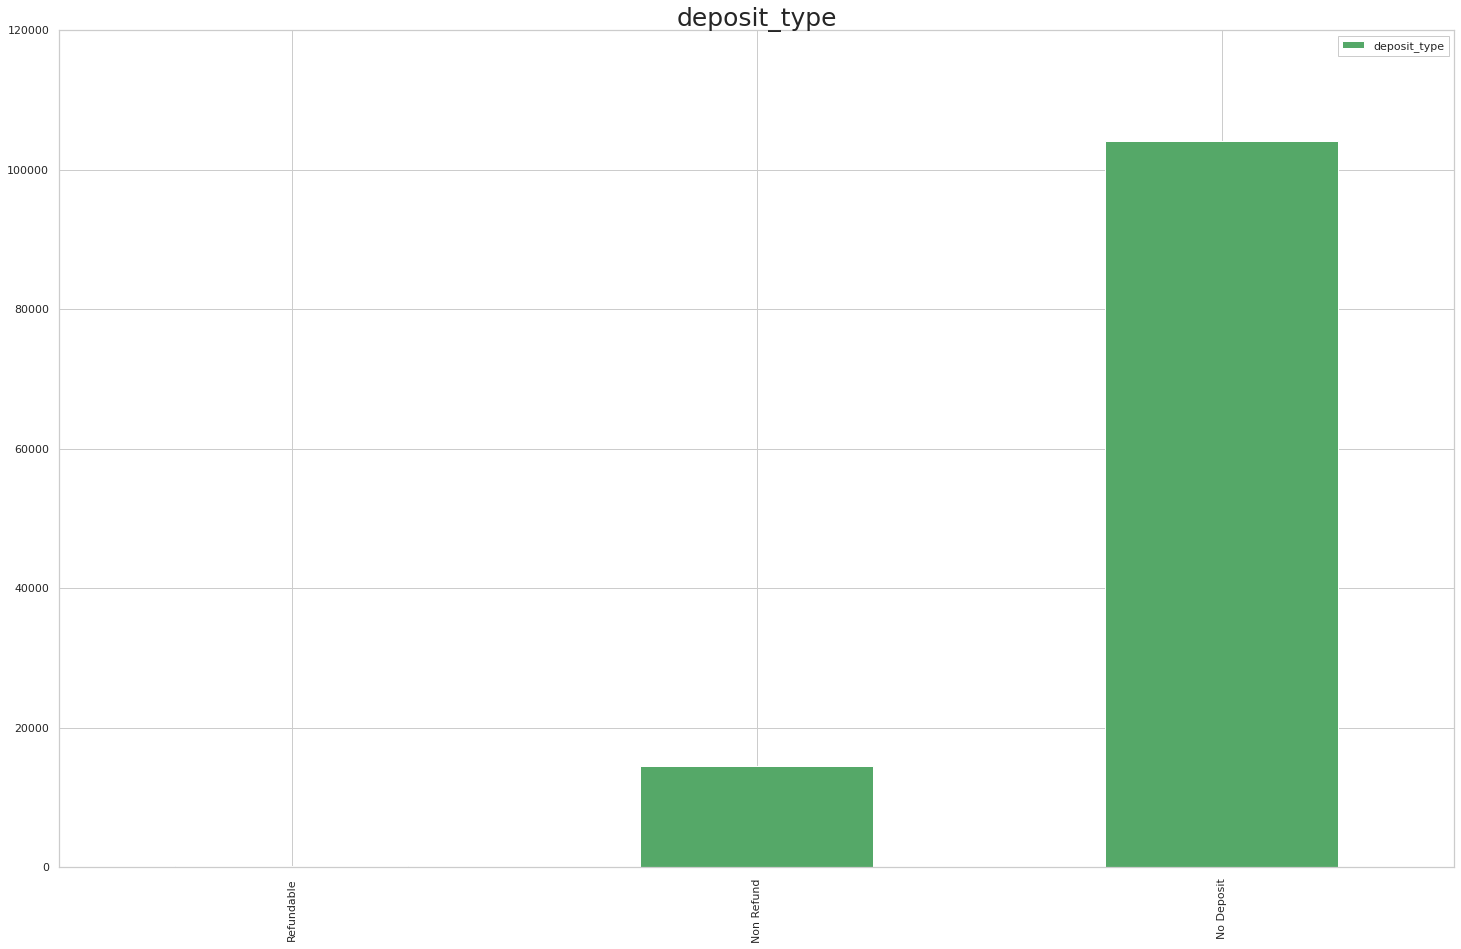

In [70]:
plt.figure(figsize=(10,5))
# use a bar plot
pd.DataFrame(dfhotelbook['deposit_type'].value_counts().sort_values()).plot(kind='bar',color='g')
plt.title('deposit_type',
          fontsize = 25)
# Show the bar plot
plt.show()

In [71]:
pd.DataFrame(((dfhotelbook[['deposit_type']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['deposit_type In Percentage'])

,deposit_type In Percentage
deposit_type,
Refundable,0.136251
Non Refund,12.256724
No Deposit,87.607025


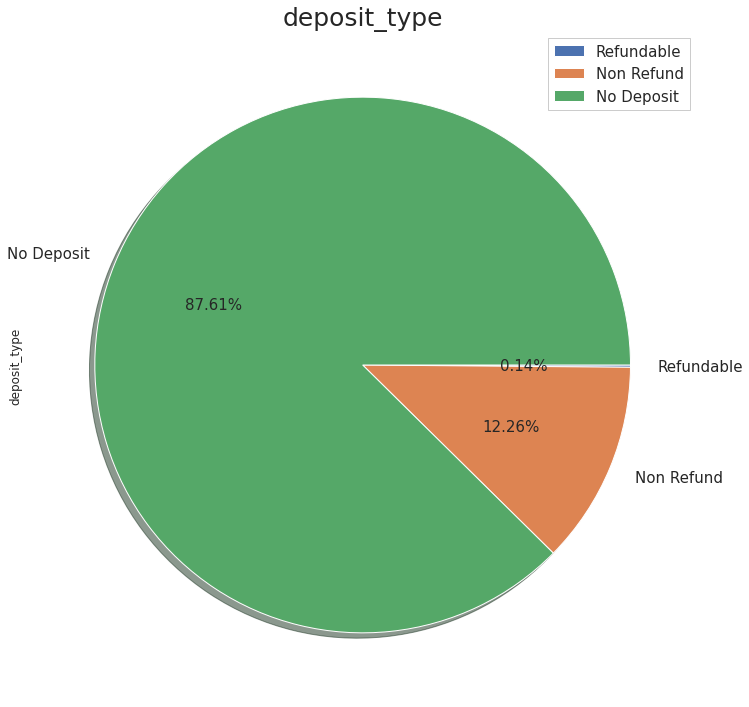

In [72]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['deposit_type'].value_counts()*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 15},shadow=True, counterclock=False)
plt.title('deposit_type',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 104163 and 87.60% is the highest bookings for  no deposit
* 14573 and 12.25% is the booking for non refundable
* 162 and 0.13% is the loweest bookings for refundable



---


#✅ Total Booking Of ***'  Required Car Parking Spaces '***


---




In [73]:
pd.DataFrame(dfhotelbook['required_car_parking_spaces'].value_counts().sort_index())

,required_car_parking_spaces
0,111590
1,7277
2,28
3,3


<Figure size 72x72 with 0 Axes>

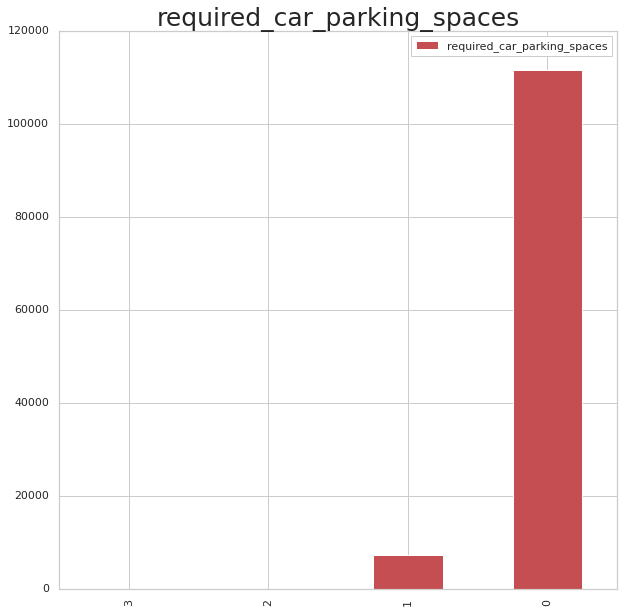

In [74]:
plt.figure(figsize=(1,1))
# use a bar plot
pd.DataFrame(dfhotelbook['required_car_parking_spaces'].value_counts().sort_values()).plot(kind='bar',color='r',figsize=(10, 10))
plt.title('required_car_parking_spaces',
          fontsize = 25)
# Show the bart plot
plt.show()

In [75]:
pd.DataFrame(((dfhotelbook[['required_car_parking_spaces']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['required_car_parking_spaces In Percentage'])

,required_car_parking_spaces In Percentage
required_car_parking_spaces,
3,0.002523
2,0.023550
1,6.120372
0,93.853555


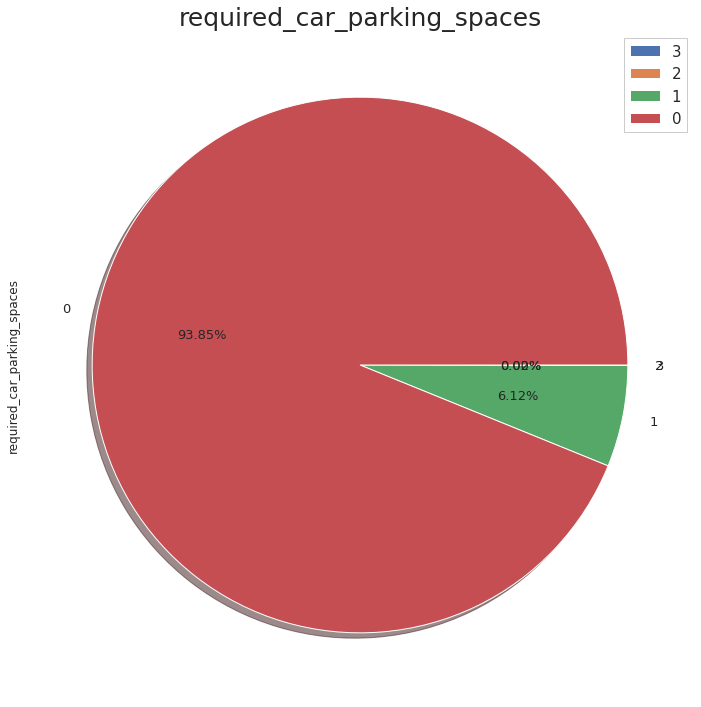

In [76]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['required_car_parking_spaces'].value_counts(normalize=True)*[100]).sort_values().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 13},shadow=True, counterclock=False)
plt.title('required_car_parking_spaces',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 11590 and 93.85% is the highest bookings for  0  Required Car Parking Spaces
* 3 and 28 is the loweest bookings for 3 and 2 Required Car Parking Spaces



---


#✅ Total Bookings  In ***'  Total Members '***


---




In [77]:
pd.DataFrame(dfhotelbook['total_members'].value_counts().sort_values())

,total_members
5.0,135
0.0,170
4.0,3942
3.0,10479
1.0,22290
2.0,81882


<Figure size 720x1080 with 0 Axes>

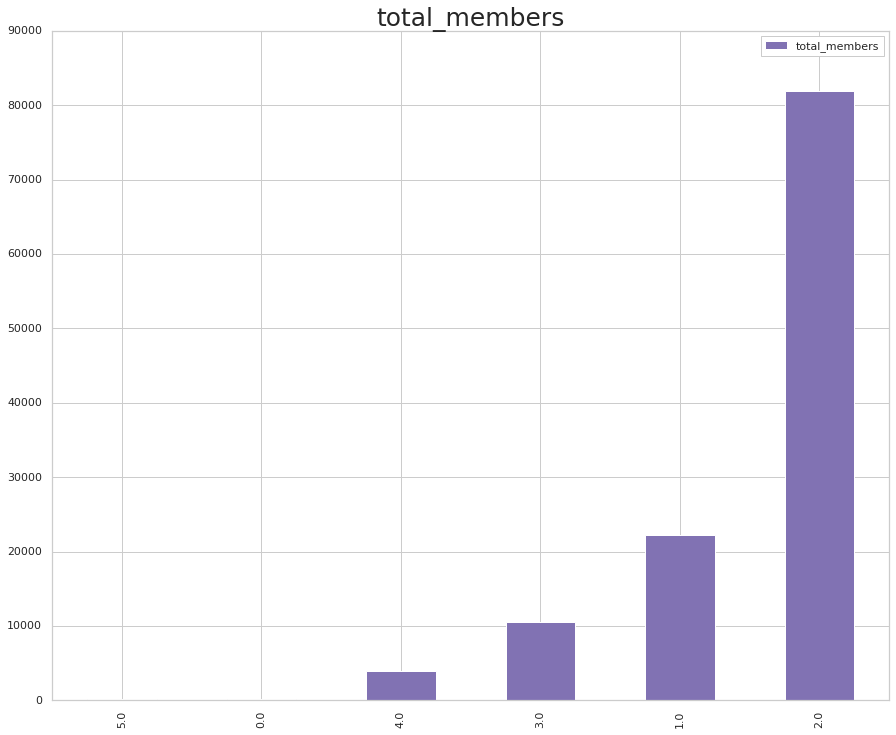

In [78]:
plt.figure(figsize=(10,15))
# use a bar plot
pd.DataFrame(dfhotelbook['total_members'].value_counts().sort_values()).plot(kind='bar',color='m',figsize=(15,12))
plt.title('total_members',
          fontsize = 25)
# Show the bar plot
plt.show()

In [79]:
pd.DataFrame(((dfhotelbook[['total_members']].value_counts(normalize=True)*[100])).sort_values(),
             columns=['total_members In Percentage'])

,total_members In Percentage
total_members,
5.0,0.113543
0.0,0.142980
4.0,3.315447
3.0,8.813437
1.0,18.747161
2.0,68.867433


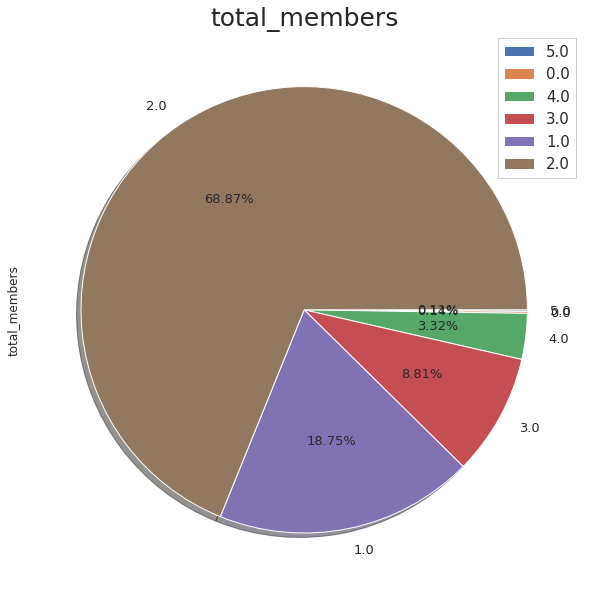

In [80]:
plt.figure(figsize=(10,10))
# use a pie chart
(dfhotelbook['total_members'].value_counts(normalize=True)*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 13},shadow=True, counterclock=False)
plt.title('total_members',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

According dataframe, bar plot and pie chart:

* 81882 and 68.86% is the highest bookings for  2.0  type Total Members
* 135 and 170 is the loweest bookings for 5.0 and 0.0 type Total Members

#  **' Kids '**

In [81]:
pd.DataFrame(dfhotelbook['kids'].value_counts().sort_values())

,kids
3.0,111
2.0,3769
1.0,5435
0.0,109583


<Figure size 720x1080 with 0 Axes>

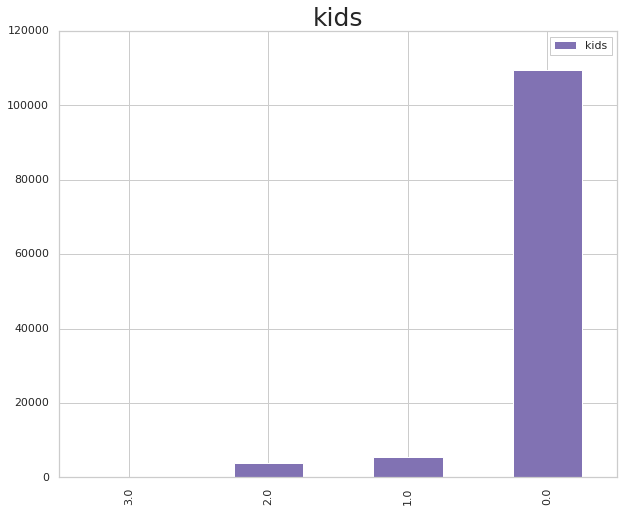

In [82]:
plt.figure(figsize=(10,15))
# use a bar plot
pd.DataFrame(dfhotelbook['kids'].value_counts().sort_values()).plot(kind='bar',color='m', figsize=(10,8))
plt.title('kids',
          fontsize = 25)
# Show the bar plot
plt.show()

In [83]:
pd.DataFrame((dfhotelbook['kids'].value_counts(normalize=True)*[100]).sort_values())

,kids
3.0,0.093357
2.0,3.169944
1.0,4.571145
0.0,92.165554


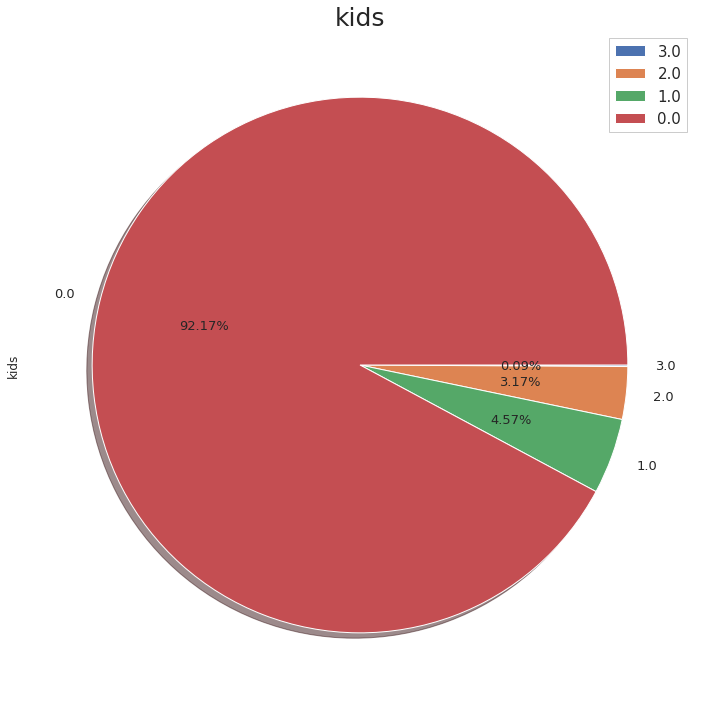

In [84]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook['kids'].value_counts(normalize=True)*[100]).sort_values().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 13},shadow=True, counterclock=False)
plt.title('kids',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()



---


#✅  ***'  ADR : '*** Average Daily Rate


---




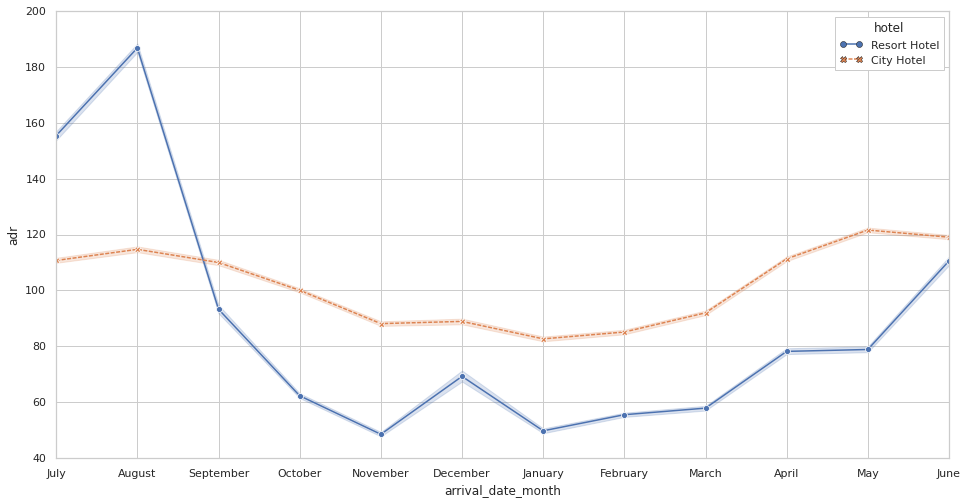

In [85]:
plt.figure(figsize=(16,8))
sns.lineplot(data=dfhotelbook, x="arrival_date_month", y="adr", hue="hotel", style="hotel",markers=True, dashes=True)

plt.show()


* Average daily rates at resort hotels are more expensive in August, July, June and May.

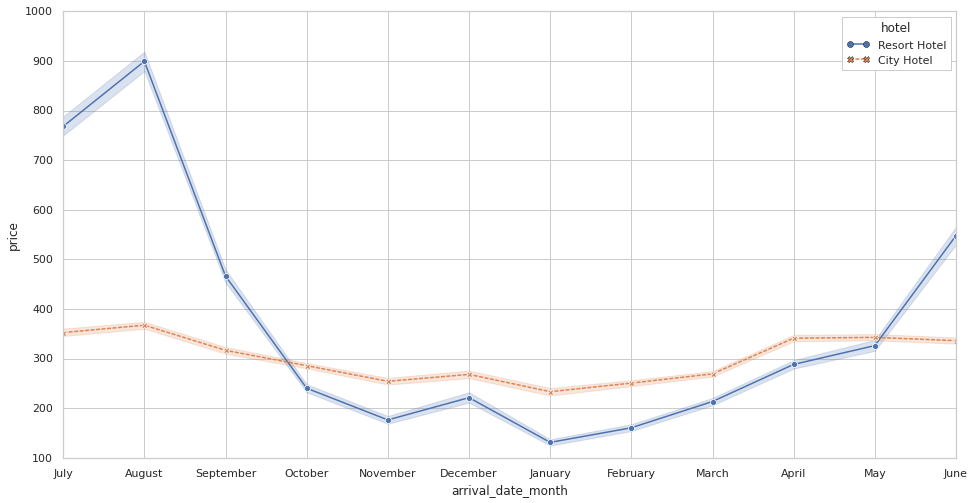

In [86]:
plt.figure(figsize=(16,8))

dfhotelbook['adr_per_person'] = dfhotelbook['adr'] / (dfhotelbook['adults'] + dfhotelbook['children']) 
actual_guests = dfhotelbook.loc[dfhotelbook["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', style='hotel', markers=True, dashes=True)
plt.show()

* Prices of resort hotels are much higher.
* Prices of city hotels do not fluctuate that much.

#Conclusion

* The majority of guests come from western europe countries.
* The majority of reservations are for city hotels.
* The number of repeated guests is too low.
* The majority of reservations converts into successful transactions.
* Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
* Encourage Direct bookings by offering special discounts
* Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.